# Main Library

In [1]:
# Reading Data & Visualzation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Encoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Make Dimentainaly Reduction
from sklearn.decomposition import PCA

# Building Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

# Building XGBoost
import xgboost as xgb

# Reading Data

In [2]:
train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict CO2 Emissions in Rwanda\train.csv")
test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict CO2 Emissions in Rwanda\test.csv")

In [3]:
print(train.shape)
train.head(5)

(79023, 76)


ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

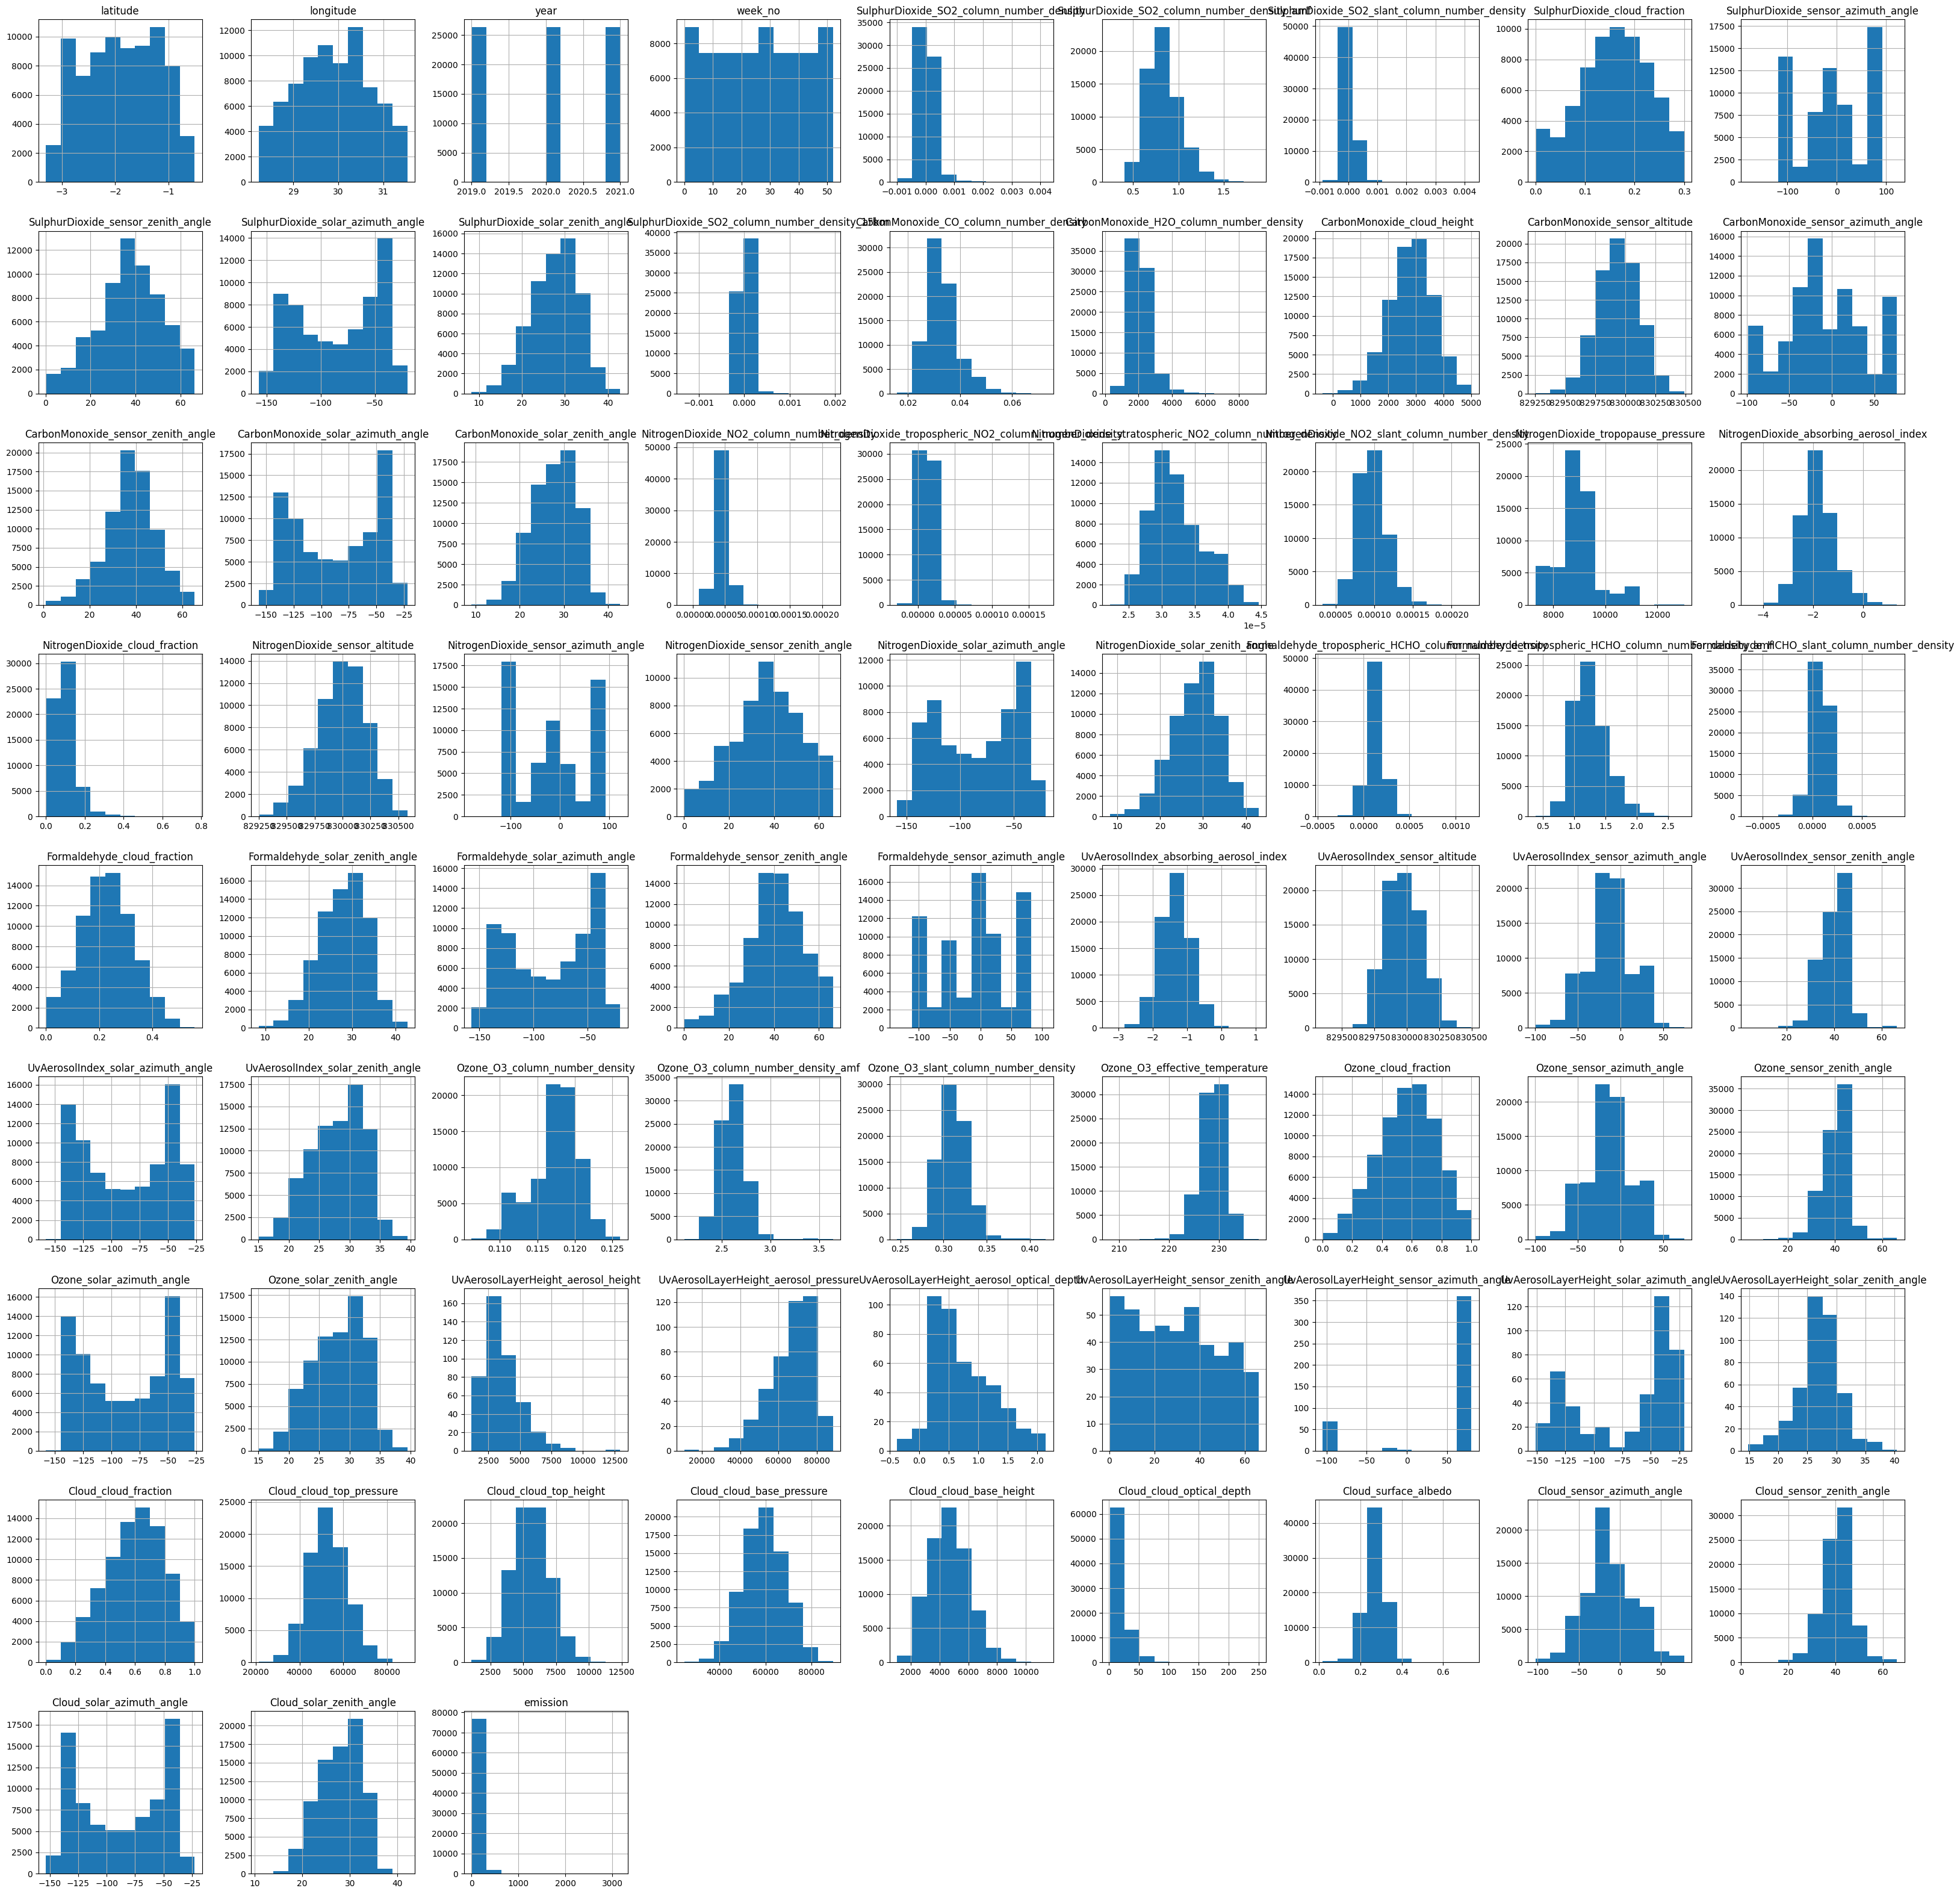

In [5]:
train.hist(figsize=(40, 40));

In [6]:
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

# Drop This Columns: 
#             Becouse THis Columns Contain Big Number Nan Values 

In [7]:
def Drop_col(data):
    columns = ["UvAerosolLayerHeight_aerosol_height", "UvAerosolLayerHeight_aerosol_pressure", "UvAerosolLayerHeight_aerosol_optical_depth",
               "UvAerosolLayerHeight_sensor_zenith_angle", "UvAerosolLayerHeight_sensor_azimuth_angle", "UvAerosolLayerHeight_solar_azimuth_angle",
               "UvAerosolLayerHeight_solar_zenith_angle", "ID_LAT_LON_YEAR_WEEK"]
    
    for col in columns:
        data.drop(columns=col, axis=1, inplace=True)
    return data

train = Drop_col(train)
test = Drop_col(test)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 non-null  float64
 8   SulphurDioxide_s

In [9]:
train["year"].value_counts()

2019    26341
2020    26341
2021    26341
Name: year, dtype: int64

# Filling Data

In [13]:
def Fill_data(data):
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    return data
train = Fill_data(train)
test = Fill_data(test)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 7   SulphurDioxide_cloud_fraction                             79023 non-null  float64
 8   SulphurDioxide_s

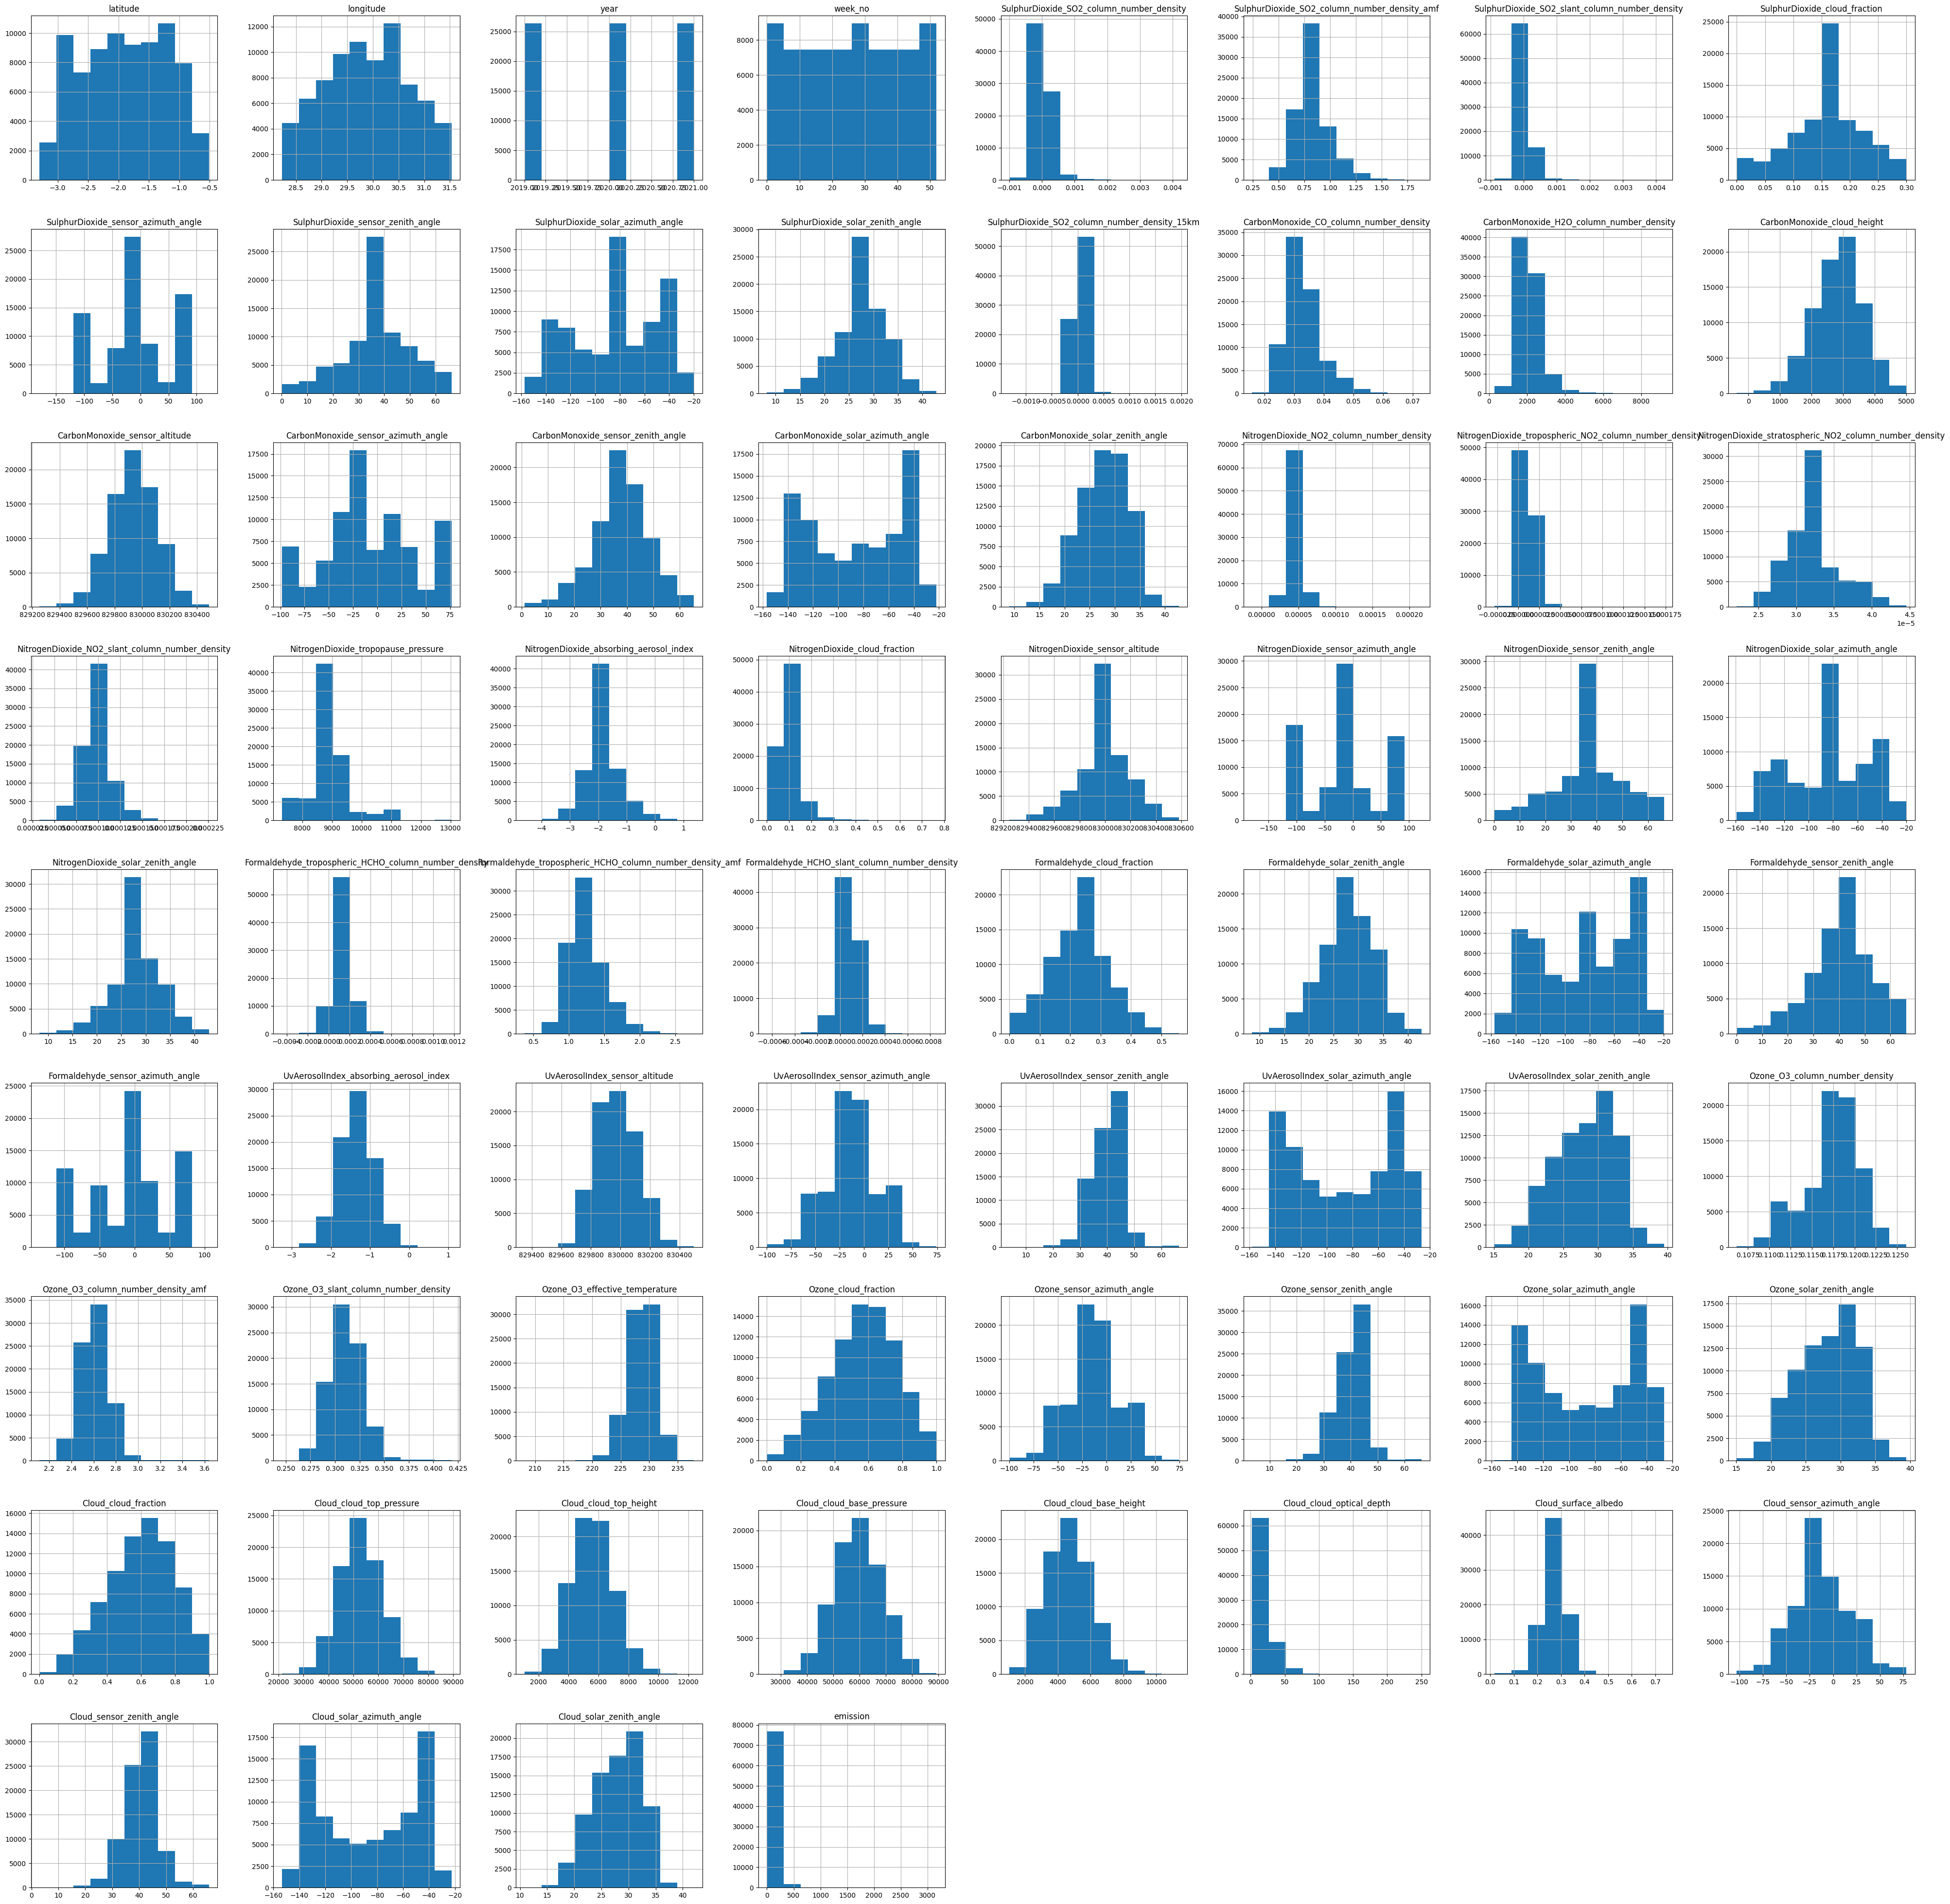

In [16]:
train.hist(figsize=(50, 50));

# Make Heat Map For Data

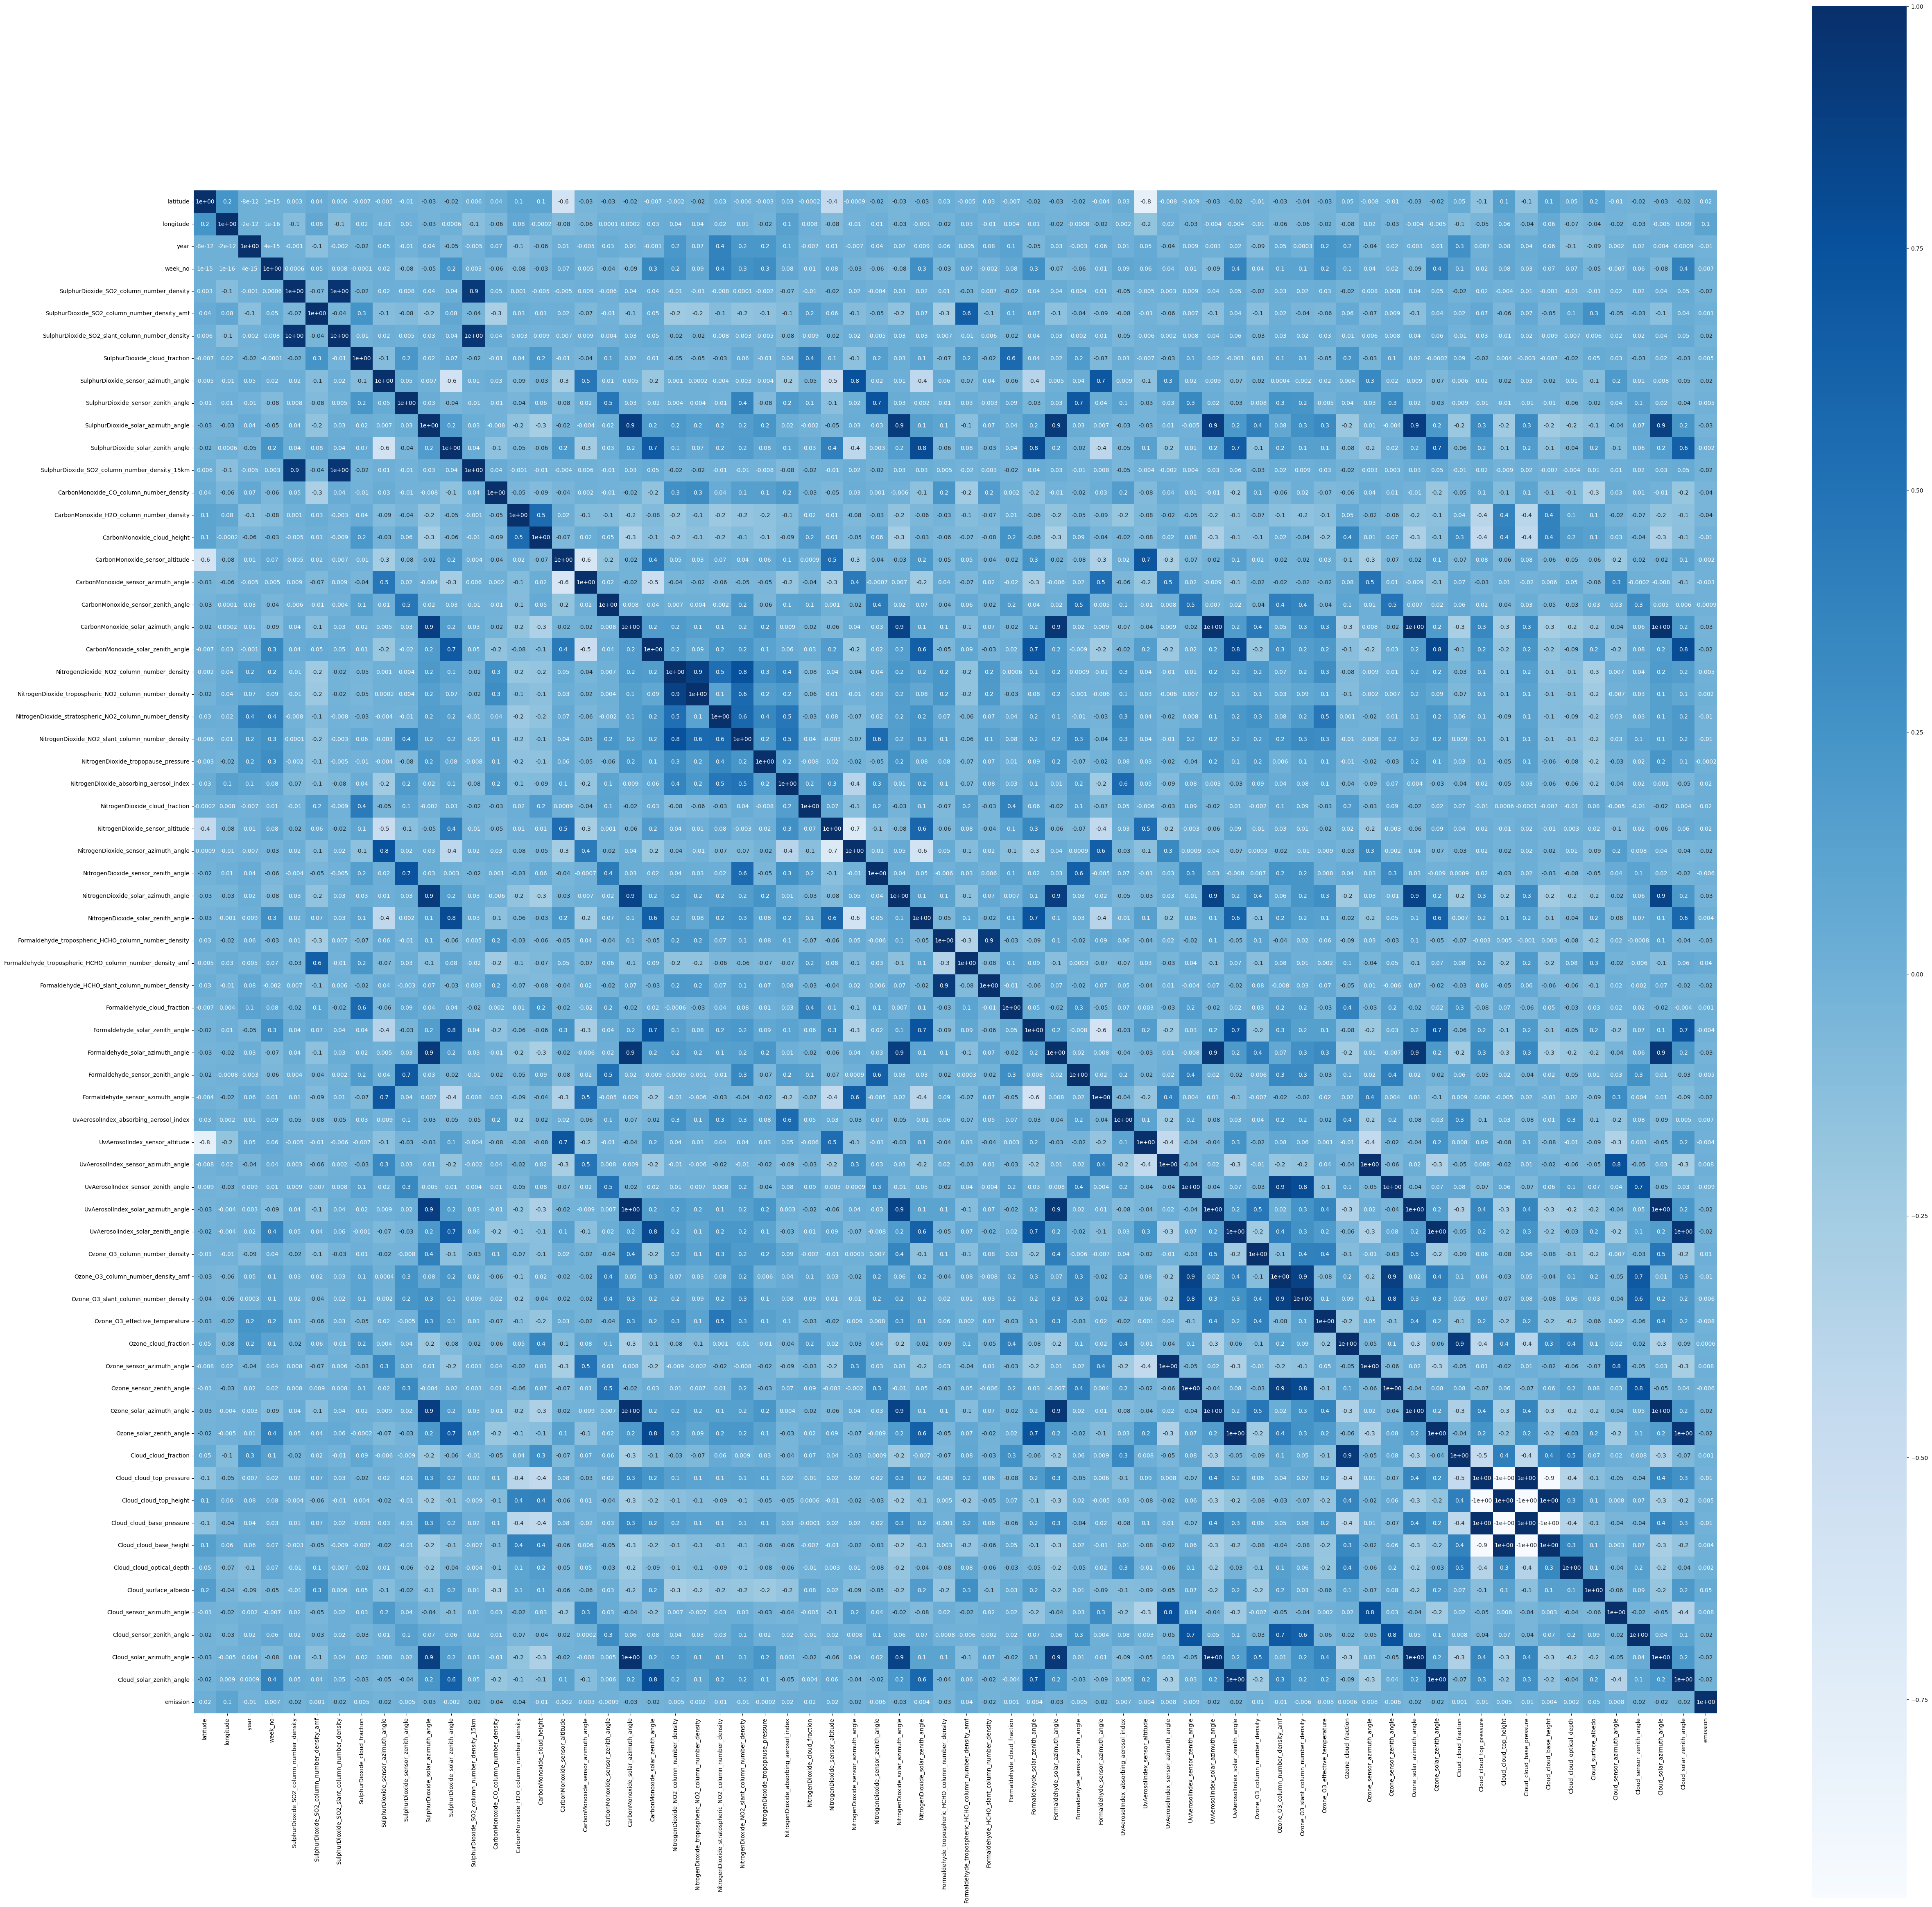

In [19]:
plt.figure(figsize=(60, 60));
sns.heatmap(train.corr(), annot=True, square=True, fmt="0.1", cmap="Blues");

# Make Boxplot ==> To Show Outliear

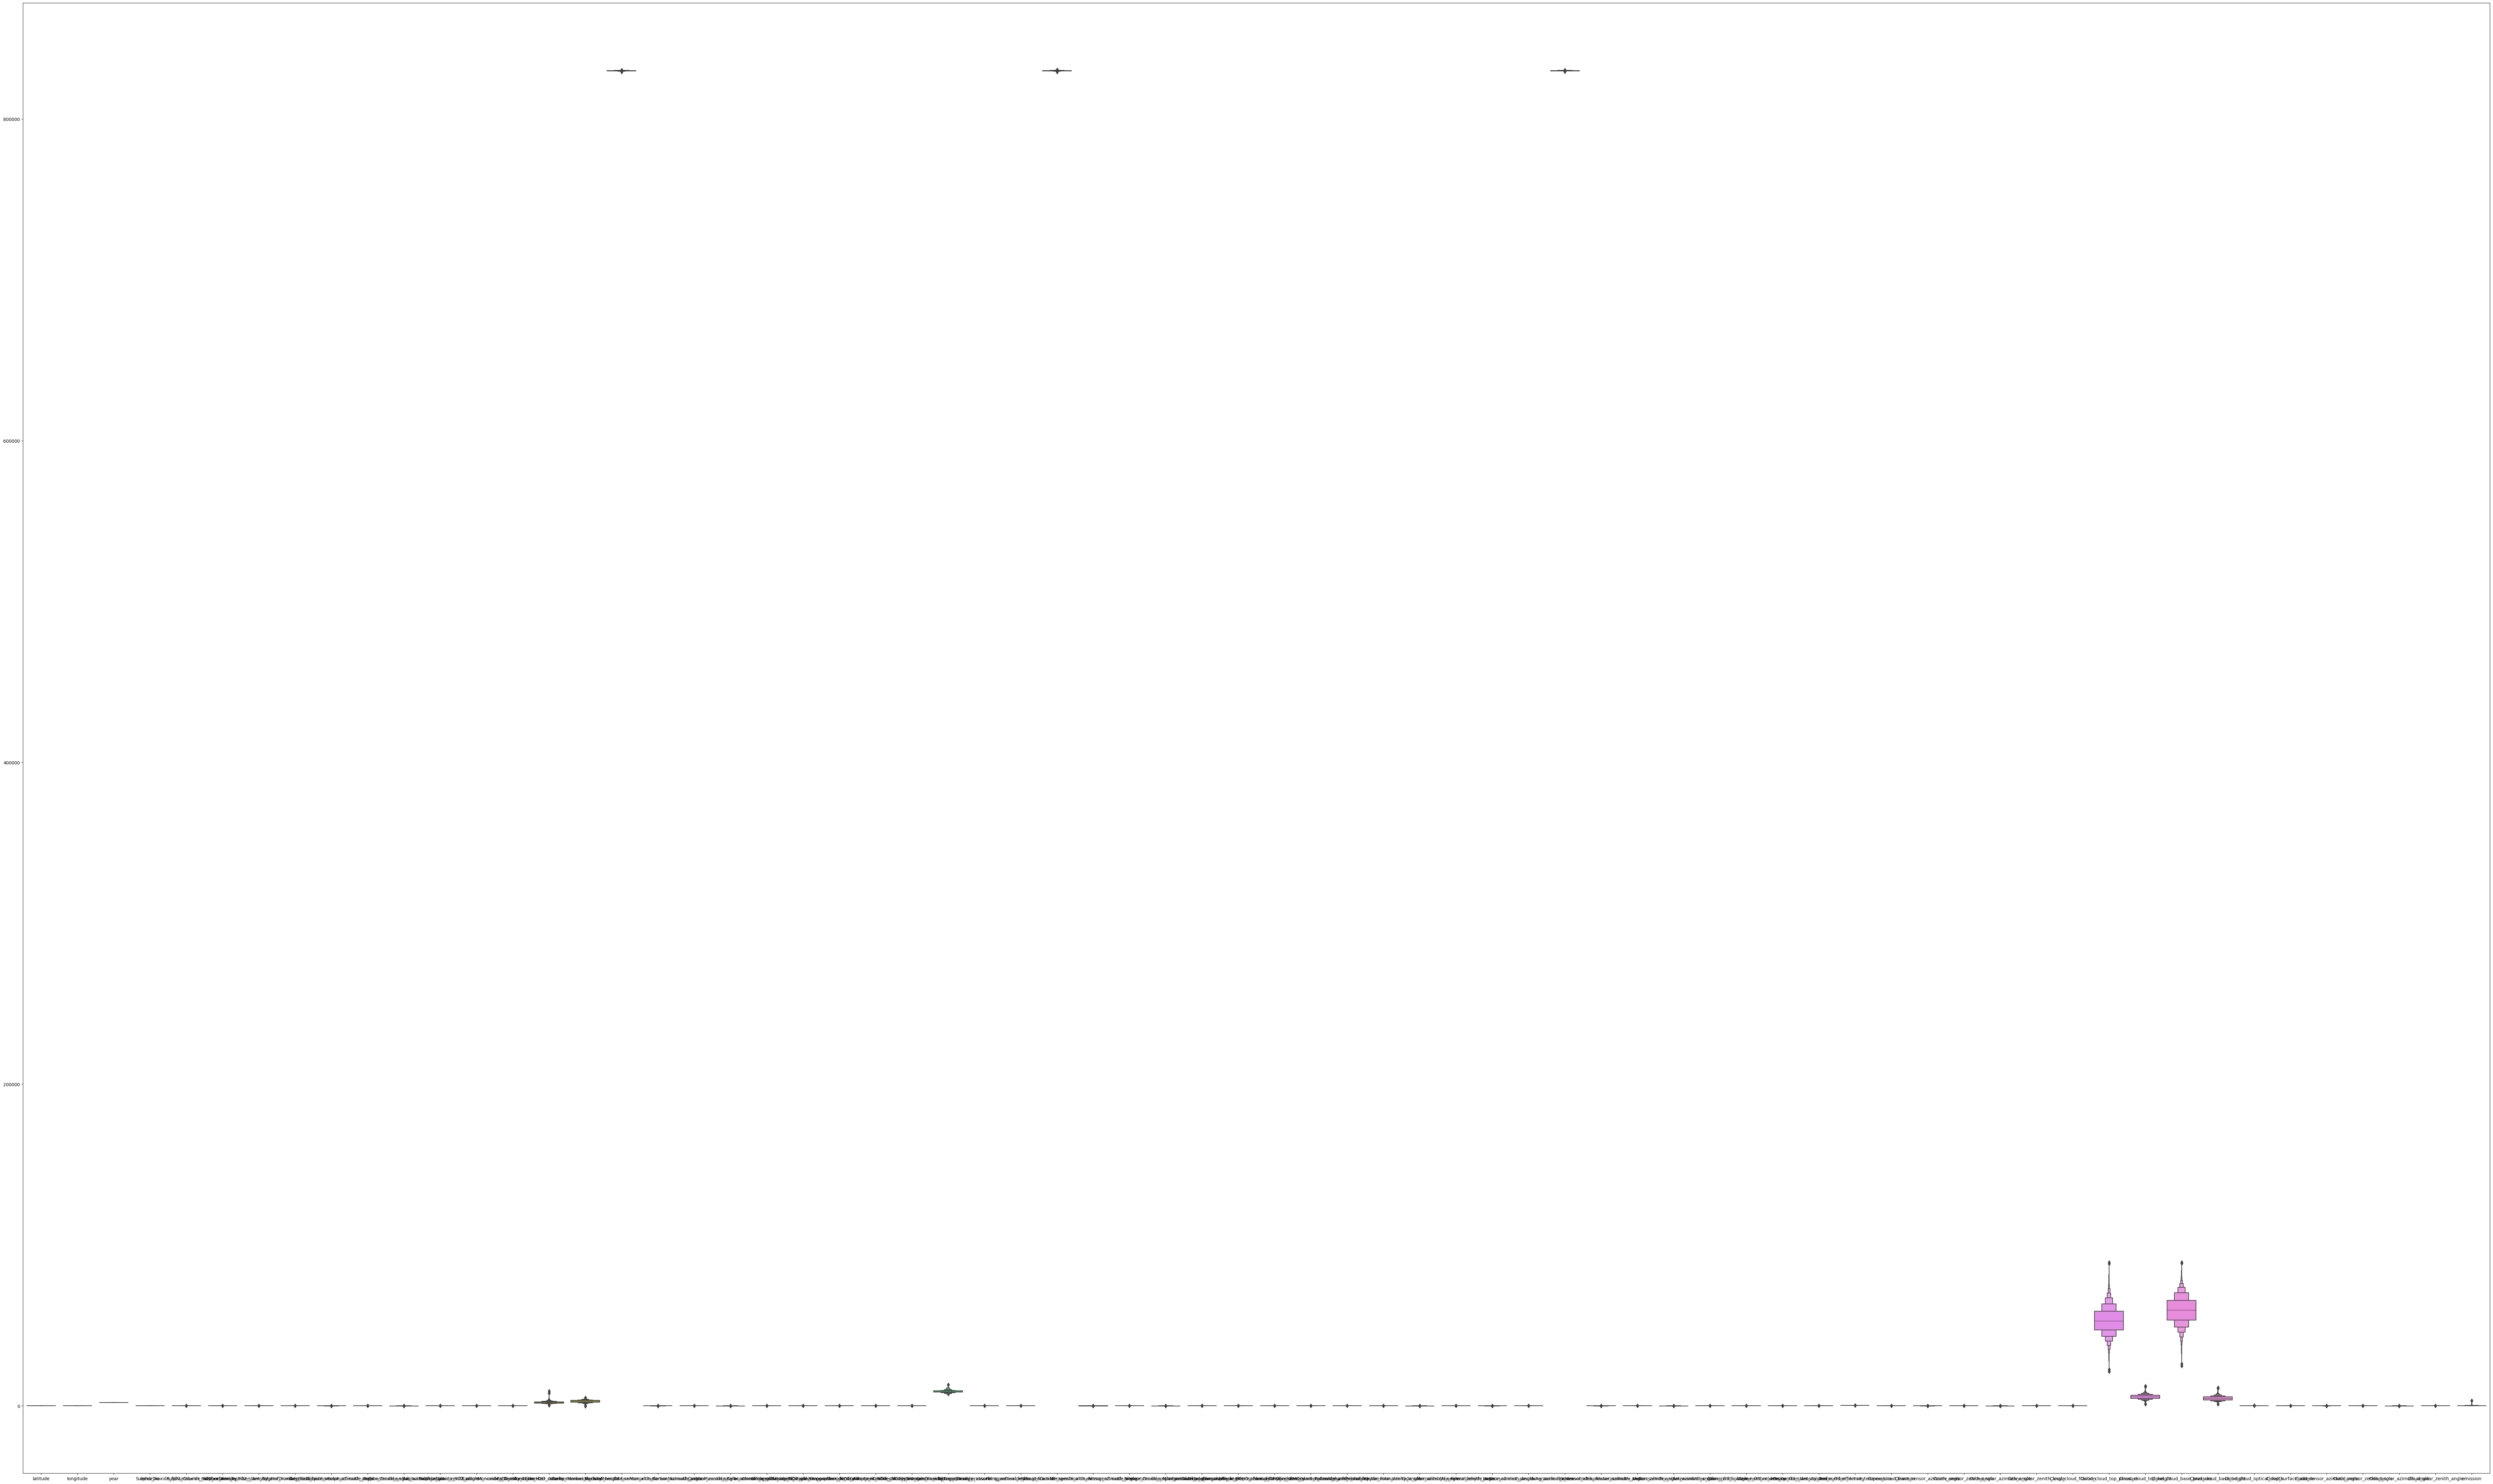

In [24]:
plt.figure(figsize=(100, 60));
sns.boxenplot(train);

# Make Splitting For Data

In [26]:
X = train.drop(columns="emission", axis=1)
Y = train["emission"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Make DR ==> PCA

In [48]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

In [49]:
x_pca

array([[ -1880.94562882,   -771.07486414,  -2057.85934175],
       [-13102.9678648 ,  -1769.67368637,   2226.77090505],
       [ -2655.57008602,  -2121.84627849,    848.21416224],
       ...,
       [  4305.32891818,    227.3463469 ,     61.05457043],
       [ 17721.35117435,   -697.66633338,    305.21764921],
       [ 16480.39812917,    835.20293241,     78.98489249]])

In [50]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, Y, train_size=0.7, random_state=42)

# Building Models

## 1 - RandomForestRegressor

In [27]:
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)


print(f"The accuracy_score of training is ==> {model_RF.score(x_train, y_train)}")
print(f"The accuracy_score of testing is ==> {model_RF.score(x_test, y_test)}")

The accuracy_score of training is ==> 0.9966548120908627
The accuracy_score of testing is ==> 0.9702394151416122


## 1 - RandomForestRegressor PCA

In [45]:
model_RF_pca = RandomForestRegressor()
model_RF_pca.fit(x_train_pca, y_train_pca)


print(f"The accuracy_score of training is ==> {model_RF_pca.score(x_train_pca, y_train_pca)}")
print(f"The accuracy_score of testing is ==> {model_RF_pca.score(x_test_pca, y_test_pca)}")

The accuracy_score of training is ==> 0.8559704822511818
The accuracy_score of testing is ==> -0.014700649197552318


## 2 - AdaBoostRegressor

In [32]:
Adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1000),
                              n_estimators=10,
                              learning_rate=1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

The predict Score Train is ==> 0.999876430013961
%----------------------------------------------------------%
The predict Score Test is ==> 0.9658726179010902


## 2 - AdaBoostRegressor PCA

In [51]:
Adaboost_reg_pca = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1000),
                              n_estimators=10,
                              learning_rate=1)


Adaboost_reg_pca.fit(x_train_pca, y_train_pca)

print(f"The predict Score Train is ==> {Adaboost_reg_pca.score(x_train_pca, y_train_pca)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg_pca.score(x_test_pca, y_test_pca)}")

The predict Score Train is ==> 0.9864056171573901
%----------------------------------------------------------%
The predict Score Test is ==> -0.27952126193072524


## 3 - CatBoost

In [39]:
model_cat = CatBoostRegressor(task_type="GPU", n_estimators=1000, max_depth=10)


model_cat.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_cat.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_cat.score(x_test, y_test)}")

Learning rate set to 0.068332
0:	learn: 141.4946649	total: 14.4ms	remaining: 14.3s
1:	learn: 135.9359379	total: 28.1ms	remaining: 14s
2:	learn: 131.0470756	total: 42ms	remaining: 14s
3:	learn: 125.9061744	total: 55.6ms	remaining: 13.8s
4:	learn: 121.7302122	total: 69.4ms	remaining: 13.8s
5:	learn: 117.9137569	total: 83.1ms	remaining: 13.8s
6:	learn: 113.7747622	total: 96.7ms	remaining: 13.7s
7:	learn: 109.5267768	total: 109ms	remaining: 13.5s
8:	learn: 106.1157162	total: 120ms	remaining: 13.2s
9:	learn: 103.0549799	total: 132ms	remaining: 13s
10:	learn: 100.6533347	total: 143ms	remaining: 12.9s
11:	learn: 99.4361834	total: 155ms	remaining: 12.8s
12:	learn: 97.3114141	total: 166ms	remaining: 12.6s
13:	learn: 94.9500426	total: 178ms	remaining: 12.6s
14:	learn: 93.8593160	total: 190ms	remaining: 12.5s
15:	learn: 91.9559547	total: 201ms	remaining: 12.4s
16:	learn: 91.0310757	total: 213ms	remaining: 12.3s
17:	learn: 89.5539666	total: 225ms	remaining: 12.3s
18:	learn: 87.1162741	total: 237ms

169:	learn: 40.7261587	total: 2.07s	remaining: 10.1s
170:	learn: 40.6128231	total: 2.08s	remaining: 10.1s
171:	learn: 40.5154421	total: 2.1s	remaining: 10.1s
172:	learn: 40.1954189	total: 2.11s	remaining: 10.1s
173:	learn: 40.1034853	total: 2.12s	remaining: 10.1s
174:	learn: 39.9567577	total: 2.13s	remaining: 10s
175:	learn: 39.8570843	total: 2.14s	remaining: 10s
176:	learn: 39.7305535	total: 2.15s	remaining: 10s
177:	learn: 39.6179984	total: 2.17s	remaining: 10s
178:	learn: 39.4911044	total: 2.18s	remaining: 9.99s
179:	learn: 39.4061603	total: 2.19s	remaining: 9.98s
180:	learn: 39.1473684	total: 2.2s	remaining: 9.96s
181:	learn: 39.0123142	total: 2.21s	remaining: 9.95s
182:	learn: 38.9205866	total: 2.23s	remaining: 9.93s
183:	learn: 38.7896404	total: 2.24s	remaining: 9.92s
184:	learn: 38.6904198	total: 2.25s	remaining: 9.9s
185:	learn: 38.5591983	total: 2.26s	remaining: 9.89s
186:	learn: 38.5194167	total: 2.27s	remaining: 9.88s
187:	learn: 38.4497365	total: 2.29s	remaining: 9.87s
188:

328:	learn: 28.5344488	total: 4.02s	remaining: 8.21s
329:	learn: 28.5200826	total: 4.04s	remaining: 8.2s
330:	learn: 28.4745142	total: 4.05s	remaining: 8.19s
331:	learn: 28.4506721	total: 4.06s	remaining: 8.18s
332:	learn: 28.4386564	total: 4.08s	remaining: 8.16s
333:	learn: 28.3847923	total: 4.09s	remaining: 8.15s
334:	learn: 28.3404277	total: 4.1s	remaining: 8.14s
335:	learn: 28.2419226	total: 4.11s	remaining: 8.12s
336:	learn: 28.1778503	total: 4.12s	remaining: 8.11s
337:	learn: 28.1596522	total: 4.13s	remaining: 8.1s
338:	learn: 28.0977345	total: 4.15s	remaining: 8.09s
339:	learn: 28.0778156	total: 4.16s	remaining: 8.07s
340:	learn: 28.0443011	total: 4.17s	remaining: 8.06s
341:	learn: 28.0252938	total: 4.19s	remaining: 8.05s
342:	learn: 27.9917720	total: 4.2s	remaining: 8.05s
343:	learn: 27.9729501	total: 4.22s	remaining: 8.04s
344:	learn: 27.9475882	total: 4.23s	remaining: 8.03s
345:	learn: 27.9045031	total: 4.24s	remaining: 8.01s
346:	learn: 27.8350227	total: 4.25s	remaining: 8s


496:	learn: 22.5514661	total: 6.15s	remaining: 6.23s
497:	learn: 22.5131918	total: 6.17s	remaining: 6.21s
498:	learn: 22.4937188	total: 6.18s	remaining: 6.21s
499:	learn: 22.4863534	total: 6.19s	remaining: 6.19s
500:	learn: 22.4751733	total: 6.21s	remaining: 6.18s
501:	learn: 22.4589960	total: 6.22s	remaining: 6.17s
502:	learn: 22.4106642	total: 6.23s	remaining: 6.16s
503:	learn: 22.3710856	total: 6.24s	remaining: 6.14s
504:	learn: 22.3499650	total: 6.26s	remaining: 6.13s
505:	learn: 22.3101304	total: 6.27s	remaining: 6.12s
506:	learn: 22.3015071	total: 6.28s	remaining: 6.11s
507:	learn: 22.2679508	total: 6.29s	remaining: 6.1s
508:	learn: 22.2409993	total: 6.31s	remaining: 6.09s
509:	learn: 22.2292941	total: 6.32s	remaining: 6.08s
510:	learn: 22.2073002	total: 6.33s	remaining: 6.06s
511:	learn: 22.1903769	total: 6.35s	remaining: 6.05s
512:	learn: 22.1775462	total: 6.37s	remaining: 6.05s
513:	learn: 22.1478966	total: 6.38s	remaining: 6.04s
514:	learn: 22.1013768	total: 6.39s	remaining: 

664:	learn: 19.0996441	total: 8.31s	remaining: 4.18s
665:	learn: 19.0907922	total: 8.32s	remaining: 4.17s
666:	learn: 19.0638696	total: 8.33s	remaining: 4.16s
667:	learn: 19.0526936	total: 8.35s	remaining: 4.15s
668:	learn: 19.0349515	total: 8.36s	remaining: 4.14s
669:	learn: 19.0284486	total: 8.37s	remaining: 4.12s
670:	learn: 19.0103140	total: 8.39s	remaining: 4.11s
671:	learn: 18.9816192	total: 8.4s	remaining: 4.1s
672:	learn: 18.9666197	total: 8.41s	remaining: 4.09s
673:	learn: 18.9437982	total: 8.42s	remaining: 4.07s
674:	learn: 18.9325045	total: 8.44s	remaining: 4.06s
675:	learn: 18.9236901	total: 8.45s	remaining: 4.05s
676:	learn: 18.9126406	total: 8.46s	remaining: 4.04s
677:	learn: 18.9011179	total: 8.48s	remaining: 4.03s
678:	learn: 18.8913434	total: 8.49s	remaining: 4.01s
679:	learn: 18.8766390	total: 8.51s	remaining: 4s
680:	learn: 18.8667368	total: 8.52s	remaining: 3.99s
681:	learn: 18.8496215	total: 8.53s	remaining: 3.98s
682:	learn: 18.8292995	total: 8.54s	remaining: 3.97

827:	learn: 16.9783442	total: 10.5s	remaining: 2.17s
828:	learn: 16.9715609	total: 10.5s	remaining: 2.16s
829:	learn: 16.9516605	total: 10.5s	remaining: 2.15s
830:	learn: 16.9299178	total: 10.5s	remaining: 2.14s
831:	learn: 16.9234179	total: 10.5s	remaining: 2.13s
832:	learn: 16.9045655	total: 10.5s	remaining: 2.11s
833:	learn: 16.8939740	total: 10.6s	remaining: 2.1s
834:	learn: 16.8866712	total: 10.6s	remaining: 2.09s
835:	learn: 16.8733344	total: 10.6s	remaining: 2.08s
836:	learn: 16.8543660	total: 10.6s	remaining: 2.06s
837:	learn: 16.8454520	total: 10.6s	remaining: 2.05s
838:	learn: 16.8382382	total: 10.6s	remaining: 2.04s
839:	learn: 16.8228693	total: 10.6s	remaining: 2.02s
840:	learn: 16.8138869	total: 10.6s	remaining: 2.01s
841:	learn: 16.7983590	total: 10.7s	remaining: 2s
842:	learn: 16.7883616	total: 10.7s	remaining: 1.99s
843:	learn: 16.7646679	total: 10.7s	remaining: 1.97s
844:	learn: 16.7564700	total: 10.7s	remaining: 1.96s
845:	learn: 16.7495174	total: 10.7s	remaining: 1.9

989:	learn: 15.1813614	total: 12.6s	remaining: 127ms
990:	learn: 15.1760137	total: 12.6s	remaining: 115ms
991:	learn: 15.1654320	total: 12.6s	remaining: 102ms
992:	learn: 15.1551334	total: 12.6s	remaining: 89.1ms
993:	learn: 15.1492353	total: 12.7s	remaining: 76.4ms
994:	learn: 15.1352395	total: 12.7s	remaining: 63.7ms
995:	learn: 15.1272276	total: 12.7s	remaining: 51ms
996:	learn: 15.1207794	total: 12.7s	remaining: 38.2ms
997:	learn: 15.1144380	total: 12.7s	remaining: 25.5ms
998:	learn: 15.1061063	total: 12.7s	remaining: 12.7ms
999:	learn: 15.0938731	total: 12.7s	remaining: 0us
The predict Score Train is ==> 0.9895188272677033
%----------------------------------------------------------%
The predict Score Test is ==> 0.9667747513861334


## 4 - XGBoostRegressor

In [41]:
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=500,
                              learning_rate=0.1)

model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.9999997078333378
%----------------------------------------------------------%
The predict Score Test is ==> 0.9734047321239464


# Submition Project

In [52]:
submit = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict CO2 Emissions in Rwanda\sample_submission.csv")
submit.head(5)

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00     81.94
1  ID_-0.510_29.290_2022_01     81.94
2  ID_-0.510_29.290_2022_02     81.94
3  ID_-0.510_29.290_2022_03     81.94
4  ID_-0.510_29.290_2022_04     81.94

In [58]:
prediction  = model_RF.predict(test)

In [59]:
prediction

array([ 3.96444702,  3.8361229 ,  4.1215107 , ..., 27.92241405,
       28.40600995, 27.07011509])

In [60]:
submit["emission"] = prediction

In [61]:
submit.head(5)

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00  3.964447
1  ID_-0.510_29.290_2022_01  3.836123
2  ID_-0.510_29.290_2022_02  4.121511
3  ID_-0.510_29.290_2022_03  4.159062
4  ID_-0.510_29.290_2022_04  4.156034

In [62]:
submit.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict CO2 Emissions in Rwanda\submission.csv", index=False)